In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

n_samples = 1500
noisy_moons = datasets.make_moons(n_samples=n_samples, noise=.05)

X= noisy_moons[0]
y= noisy_moons[1]

plt.plot(X[:,0], X[:,1], 'x')
plt.show()

<Figure size 640x480 with 1 Axes>

In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def d_sigmoid(x):
    return sigmoid(x)*(1-sigmoid(x))

In [3]:
Neurons = np.array([2, 4, 5, 2])  #Dos neuronas en la capa de entrada y 2 en la de salida

np.random.random((Neurons[1], Neurons[0]))

array([[0.61448548, 0.19620894],
       [0.29124433, 0.13937985],
       [0.06564681, 0.54987576],
       [0.07760924, 0.17333212]])

In [4]:
def weigth_init(NeuronVector):
    W = list()
    for layer in range(len(NeuronVector) - 1):
        W.append(np.random.random((Neurons[layer + 1], Neurons[layer])))
        print(W[layer])

In [32]:
weigth_init(Neurons)

def weigth_init(NeuronVector_):
    W = list()
    for layer in range(len(NeuronVector_) - 1):
        W.append(np.random.random((NeuronVector_[layer + 1], NeuronVector_[layer] + 1))) #Plus + 1, BIAS
    return W

In [85]:
def forward_propagation(X_, W_):
    A = list()
    Z = list()
    A.append(X_.T)
        
    for layer in range(len(W_)):
        
        A[layer] = np.insert(A[layer], 0, 1,axis=0)
        
        Z.append(np.dot(W_[layer], A[layer]))
        
        A.append(sigmoid(np.dot(W_[layer], A[layer])))
        
    return A, Z

In [86]:
W = weigth_init(Neurons)
A, Z = forward_propagation(X, W)
A

[array([[ 1.        ,  1.        ,  1.        , ...,  1.        ,
          1.        ,  1.        ],
        [ 0.8288476 ,  1.25947659,  0.37018548, ..., -0.82402769,
          0.38610445,  0.38119194],
        [ 0.5435653 , -0.46805914, -0.21577131, ...,  0.55935373,
         -0.23782676,  0.91069988]]),
 array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [0.77037914, 0.72587473, 0.56240655, ..., 0.39365653, 0.56274382,
         0.73203555],
        [0.63423245, 0.53298758, 0.52545923, ..., 0.56800451, 0.52346511,
         0.65747984],
        [0.65622738, 0.61769381, 0.54439974, ..., 0.48160559, 0.54420914,
         0.64086451],
        [0.85491636, 0.81501507, 0.73362043, ..., 0.65392792, 0.73326671,
         0.84252003]]),
 array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
         1.        ],
        [0.92717457, 0.91665273, 0.89697049, ..., 0.87696829, 0.89685381,
         0.92482761],
        [0.9187588

In [87]:
def backpropagation(X_, Y_, W_, Z_, A_):
    Delta = list()
    
    print(Y)
    Delta.append((Y_-A_[-1])*d_sigmoid(Z_[-1]))
    
    for layer in range(len(W_), 1, -1):
        Delta_ = np.dot(W_[layer-1].T, Delta[len(W_)-layer])
        Delta_ = np.delete(Delta_, 0, axis=0) 
        Delta.append(Delta_*d_sigmoid(Z_[layer-2]))
    
    DJ = list()
    for layer in range(len(W_)):
        DJ.append(-np.dot(Delta[-1-layer], A_[layer].T))
    
    return DJ

In [88]:
#One hot encoding
Y = np.zeros(shape=(Neurons[-1], y.shape[0]))
for i in range(0, X.shape[0]):
    Y[y[i], i] = 1

print('----------------------------------------------------------------------------------')
backpropagation(X, Y, W, Z, A)

----------------------------------------------------------------------------------
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]


[array([[ 2.54438155,  0.37709403,  0.8342272 ],
        [ 2.8680747 ,  0.65063483,  0.95458014],
        [ 2.74350927,  0.80718475,  0.73572555],
        [ 2.5530766 , -0.06246379,  0.97142816]]),
 array([[5.66022688, 3.35468563, 3.30841018, 3.22793524, 4.28186537],
        [3.35960092, 2.04386813, 1.95927947, 1.93936425, 2.56834359],
        [5.27535638, 3.00980911, 3.18422478, 2.96867594, 3.94815003],
        [6.85944225, 4.33004318, 3.99858509, 4.03194486, 5.32537303],
        [3.33152003, 2.17707417, 1.88390573, 1.98390318, 2.61455044]]),
 array([[30.88924799, 28.21870276, 28.06790794, 27.28151121, 23.09205407,
         25.53859375],
        [66.33942369, 59.8952452 , 59.64645516, 58.16868359, 48.84544976,
         54.10291217]])]

In [89]:
def NeuralNetwork(X_, y_, NeuronVector_, alpha = 0.01, epochs = 10):
    W = weigth_init(NeuronVector_)
    print(W)
    
    #One hot encoding
    Y = np.zeros(shape=(NeuronVector_[-1], y_.shape[0]))
    for i in range(0,X.shape[0]):
        Y[y_[i], i] = 1
        
    print(Y)
    
    m = X_.shape[0]
    
    for j in range(0,epochs):
        A, Z = forward_propagation(X_, W)
        
        J = 1/m * np.sum(np.dot((Y-A[-1]).T,(Y-A[-1])))

        print(J)
        
        DJ = backpropagation(X_, Y, W, Z, A)
        for layer in range(len(W)):
            W[layer] = W[layer] - alpha * DJ[layer]
    
    return W, A       

In [90]:
Xnorm = (X - np.min(X, axis = 0))/(np.max(X, axis = 0) - np.min(X, axis = 0))
Xnorm

array([[0.60174329, 0.66529296],
       [0.73300886, 0.07503588],
       [0.46193257, 0.2222394 ],
       ...,
       [0.09790904, 0.67450511],
       [0.46678503, 0.20937061],
       [0.46528759, 0.87950664]])

In [91]:
W, A = NeuralNetwork(Xnorm, y, np.array([2, 10, 10, 10, 2]), alpha = 0.001, epochs = 1000)

[array([[0.2678297 , 0.15532353, 0.74807899],
       [0.36332183, 0.25658205, 0.40438716],
       [0.1898101 , 0.02284405, 0.8078651 ],
       [0.17744107, 0.71651112, 0.17375489],
       [0.13425642, 0.72406691, 0.15572092],
       [0.64263983, 0.71712112, 0.54406291],
       [0.37086593, 0.6193071 , 0.21307834],
       [0.84493907, 0.80198892, 0.69774639],
       [0.43269097, 0.05040958, 0.95661579],
       [0.6794018 , 0.22123758, 0.95707072]]), array([[0.75462957, 0.48311713, 0.42570791, 0.62517092, 0.65847441,
        0.30368747, 0.25252124, 0.28269431, 0.64698761, 0.05655942,
        0.73586213],
       [0.77347018, 0.66493709, 0.84322071, 0.19257892, 0.16896567,
        0.14344244, 0.84932663, 0.77734459, 0.94923996, 0.02749054,
        0.85381771],
       [0.07372428, 0.29129789, 0.80400085, 0.06077188, 0.18143297,
        0.02793781, 0.76218736, 0.48329458, 0.15544285, 0.01628278,
        0.56540809],
       [0.60712651, 0.90878717, 0.50431735, 0.21961984, 0.24412082,
        

1.6008769806141742e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6009409680973382e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6010050077331545e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6010690991533257e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.601133242704833e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6011974379352977e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6012616852248602e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.601325984321278e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6013903358060114e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6014547390099665e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6015191946389487e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.601583701705304e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6016482613032677e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6017128725541359e-06
[[1. 0. 0. ... 1. 

1.6085079905288068e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6085779490329817e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6086479606573315e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.608718025321328e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6087881425950929e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6088583127048158e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6089285356362855e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6089988116121388e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6090691402522357e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6091395220160601e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.609209956350573e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6092804439509223e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6093509841551185e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6094215774913323e-06
[[1. 0. 0. ... 1.

1.616901574286326e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.616977663173221e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6170538054502969e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6171300015995388e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6172062516754218e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6172825554233347e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6173589133927634e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6174353249406673e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6175117902967882e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6175883096233671e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6176648826231599e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6177415098361792e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6178181908633368e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6178949257342386e-06
[[1. 0. 0. ... 1.

1.6260067109120277e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6260890475159328e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.626171438788996e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6262538855151831e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6263363867873674e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6264189429300302e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.626501553895802e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6265842201370617e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.626666941239326e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6267497169053513e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6268325480126578e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6269154338163598e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.626998374703703e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6270813706237655e-06
[[1. 0. 0. ... 1. 0

1.6360151630803916e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6361039902091553e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6361928733132912e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6362818127089913e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6363708079640086e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6364598594549307e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6365489671509673e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6366381307939549e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6367273511240418e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6368166269889647e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6369059591797945e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6369953479878536e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6370847924977264e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6371742935075891e-06
[[1. 0. 0. ... 

1.6468869259173383e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6469824491463688e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6470780295515888e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6471736674101104e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6472693631541801e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.647365115818644e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6474609262845756e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.64755679416236e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6476527196521337e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6477487025608658e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6478447428755297e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6479408410236356e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6480369965078031e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6481332093244797e-06
[[1. 0. 0. ... 1. 

1.6584560040087125e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6585583294919104e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6586607133260617e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6587631563638183e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6588656584512287e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6589682192223639e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6590708389590721e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6591735176566164e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.659276255484343e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6593790521106655e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6594819076622968e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6595848224199017e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6596877958742577e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6597908285298502e-06
[[1. 0. 0. ... 1

1.6707217974184137e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.670831041099774e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6709403451914776e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.67104971008906e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6711591350961896e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6712686208582757e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6713781667938577e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6714877733861043e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6715974404301429e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6717071683819047e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6718169563283425e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6719268055460645e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.672036714756094e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.672146684641736e-06
[[1. 0. 0. ... 1. 0.

1.6840336058739543e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6841500809997948e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6842666187540562e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6843832184723812e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.68449988014648e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6846166041671514e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6847333905130785e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]
1.6848502390587328e-06
[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]


In [92]:
print(Y)
A, Z = forward_propagation(Xnorm, W)

[[1. 0. 0. ... 1. 0. 1.]
 [0. 1. 1. ... 0. 1. 0.]]


In [93]:
print(A[-1])
pred = np.argmax(A[-1], axis=0)
pred

[[0.50004209 0.50000603 0.50000196 ... 0.5000167  0.50000112 0.50004829]
 [0.49997126 0.49997726 0.49998162 ... 0.4999832  0.49998173 0.49997109]]


array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

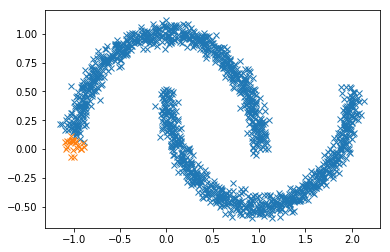

In [95]:
for j in range(2):
    ind = pred == j
    plt.plot(X[ind,0], X[ind,1], 'x')
plt.show()